<a href="https://colab.research.google.com/github/pastoril10/Sinais-de-trading-e-Backtesting-usando-Vectorbt---Bitcoin/blob/main/Sinais_de_trading_e_Backtesting_usando_Vectorbt_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sinais de trading e Backesting usando o Vectorbt

O Vectorbt é um pacote Python para análise quantitativa que adota uma nova abordagem para backtesting. Embora existam muitos ótimos pacotes de backtesting para Python, o vectorbt combina um backtester extremamente rápido e uma ferramenta de ciência de dados: ele se destaca no desempenho de processamento e oferece ferramentas interativas para explorar fenômenos complexos na negociação.

Neste trabalho, os dados foram coletadados do yahoo finance por meio da biblioteca yfinance. 
As estratégias utilizadas foram a de cruzamento de média móvel simples de curto e longo prazo. 



## 1. Instanlando as bibliotecas

In [27]:
!pip install vectorbt
#!pip install python-binance vectorbt
!pip install quantstats
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2. Importando as bibliotace

In [3]:
import vectorbt as vbt
#from binance.client import Client
import yfinance as yf

In [4]:
#cliente = Client()

In [5]:
#Data de inicio e término na coleta dos dados
start = "2020-01-01"
end = "2022-01-01"

In [6]:
#Visualizando todos os tickers e os ultimos preços dentro da Binance
#all_price = cliente.get_all_tickers()
#all_price

## 3. Importando os dados do Bitcoin

In [7]:
#start = '2021-01-01 UTC'
#end = '2021-06-01 UTC'
#data = vbt.YFData.download(['BTC-USD', 'ETH-USD', 'ADA-USD'], start=start, end=end)
#data.get("Close")

In [8]:
#data.plot(column='Close', base=1).show()

In [28]:
precos_btc = yf.download("BTC-USD", 
                         start = start, 
                         end = end)

[*********************100%***********************]  1 of 1 completed


In [10]:
#precos_btc = vbt.BinanceData.download("BTCBRL", start= "2020-01-01", end = "2022-01-01",interval = "1d").get()

In [29]:
precos_btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [30]:
#Criando DF apenas com os valores do fechamento
fechamento_btc = precos_btc["Close"]

#Criando media movel rapida de 5 dias
fast_ma = vbt.MA.run(fechamento_btc, 5, short_name='fast_ma')

#Criando media movel lenta de 25
slow_ma = vbt.MA.run(fechamento_btc, 25, short_name='slow_ma')

### Estrategia simples - Padrão a Cruz Dourada (Golden Cross


* Media curta cruzando para cima - compra

* Media curta cruzando para baixo - venda


Um dos padrões clássicos de velas, o padrão da cruz dourada, é um sinal de rompimento de alta que ocorre quando uma média móvel mais rápida cruza acima de uma média móvel mais lenta.As médias móveis simples (SMAs) de período 50 e 200 são as mais comumente usadas para calcular uma cruz dourada, mas outras combinações podem ser usadas para várias abordagens de negociação, prazos e outras preferências individuais.


  A cruz dourada produz um padrão gráfico de alta quando a média móvel de curto prazo cruza acima da média móvel de longo prazo. Os comerciantes que usam o padrão cruzado dourado frequentemente interpretam essa ocorrência como um sinal para assumir uma posição longa ou confirmar uma tendência ou viés de alta.


In [13]:
#Sinal de compra - Se a mm rápida cruzar para cima a mm lenta. 
entries = fast_ma.ma_crossed_above(slow_ma)

#Sinal de venda - Se a mm rápida cruzar para baixo a mm lenta. 
exits = fast_ma.ma_crossed_below(slow_ma)

In [31]:
#Montando o portfolio de compra e venda
pf = vbt.Portfolio.from_signals(fechamento_btc, 
                                entries, 
                                exits, 
                                init_cash=1000, 
                                fees=0.000)

#fees é a porcentagem paga para a corretora, inicialmente coloquei valor igual a 0

In [32]:
#Visualizando a performace da nossa estrategia
pf.stats()

Start                                2020-01-01 00:00:00
End                                  2022-01-01 00:00:00
Period                                 732 days 00:00:00
Start Value                                       1000.0
End Value                                    5057.278587
Total Return [%]                              405.727859
Benchmark Return [%]                          562.300806
Max Gross Exposure [%]                             100.0
Total Fees Paid                                      0.0
Max Drawdown [%]                               44.007945
Max Drawdown Duration                  314 days 00:00:00
Total Trades                                          16
Total Closed Trades                                   16
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                       43.75
Best Trade [%]                                 71.488395
Worst Trade [%]                

Obtivemos um lucro de aproximadamente 406% sobre o valor investido. 

In [33]:
#Momentos e preços de compra e venda 
pf.orders.records_readable

,Order Id,Column,Timestamp,Size,Price,Fees,Side
0,0,0,2020-04-01,0.151360,6606.776367,0.0,Buy
1,1,0,2020-05-24,0.151360,8790.368164,0.0,Sell
2,2,0,2020-05-30,0.137160,9700.414062,0.0,Buy
3,3,0,2020-06-15,0.137160,9450.702148,0.0,Sell
4,4,0,2020-07-10,0.139701,9278.807617,0.0,Buy
5,5,0,2020-07-14,0.139701,9243.213867,0.0,Sell
6,6,0,2020-07-21,0.137739,9374.887695,0.0,Buy
7,7,0,2020-08-25,0.137739,11366.134766,0.0,Sell
8,8,0,2020-09-19,0.141113,11094.346680,0.0,Buy
9,9,0,2020-09-23,0.141113,10246.186523,0.0,Sell


In [34]:
#Criando gráficos que mostram os momento de entrada e saida. Se vermelho, saimos com prejuizo, se verde saimos com lucro. 
pf.plot().show()

In [18]:
fig = fechamento_btc.vbt.plot(trace_kwargs=dict())
fast_ma.ma.vbt.plot(trace_kwargs=dict(name='Fast MA'), fig=fig)
slow_ma.ma.vbt.plot(trace_kwargs=dict(name='Slow MA'), fig=fig)
pf.positions.plot(close_trace_kwargs=dict(visible=True), fig=fig).show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


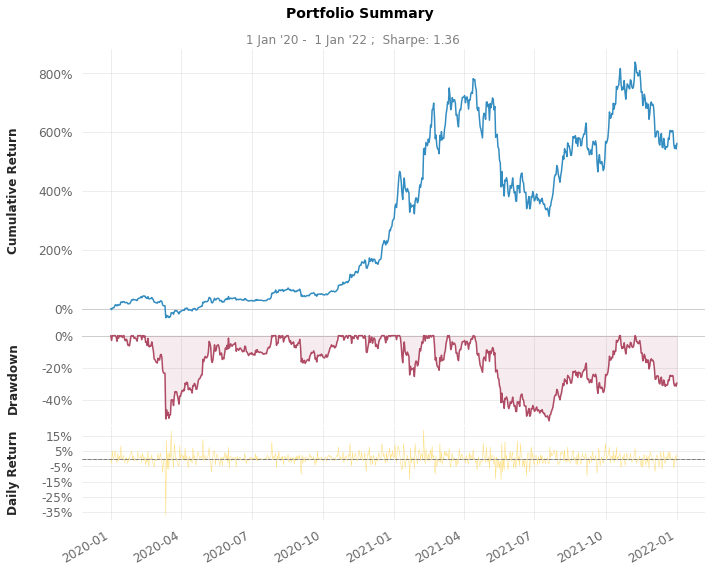

In [19]:
#Visualize o desempenho usando o QuantStats

returns = fechamento_btc.vbt.to_returns()
returns.vbt.returns.qs.plot_snapshot()

In [26]:
#Plotando 3 quedas de preço mais profundas durante o periodo
fechamento_btc = vbt.YFData.download('BTC-USD', start="2017-01-01").get('Close')
fechamento_btc.vbt.drawdowns.plot(top_n=5)
fechamento_btc.vbt.drawdowns.plot(top_n=3).show()

In [25]:
pf.plot(subplots=['cash', 'assets', 'value']).show()

In [23]:
#Identificar extremos locais
vbt.LEXLB.run(fechamento_btc, 0.20, 0.20).plot().show()